# Import Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Spotify API Configuration with Spotipy

In [169]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred

scope='user-library-read playlist-modify-public playlist-read-private playlist-modify-private user-top-read'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=cred.client_ID, 
    client_secret=cred.client_SECRET, 
    redirect_uri=cred.redirect_uri, 
    scope=scope))

In [170]:
def analyze_playlist(creator, playlist_id):
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

### First-time Run

### Existing CSV Run

In [171]:
vibes_to_reset = pd.read_csv('data/vibes_to_reset.csv')
vibes_to_reset.head()

artist                  album                track_name  \
0       Mac Ayres             Drive Slow                      Easy   
1   Daniel Caesar               Freudian  Best Part (feat. H.E.R.)   
2     Bruno Major  A Song For Every Moon                    Easily   
3           keshi              skeletons                 skeletons   
4  Kendrick Lamar                  DAMN.       LOVE. FEAT. ZACARI.   

                 track_id  danceability  energy  key  loudness  mode  \
0  58dSdjfEYNSxte1aNVxuNf         0.722   0.282    5    -7.484     1   
1  1RMJOxR6GRPsBHL8qeC2ux         0.524   0.364    7   -10.209     1   
2  2k9N4caeCIJLOWwWwssrEM         0.772   0.256    7    -8.545     0   
3  2BuJrxYKhYky20dQqTlobO         0.719   0.265    2   -12.782     1   
4  6PGoSes0D9eUDeeAafB2As         0.800   0.585   10    -7.343     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1060         0.373           0.00557     0.147    0.217   91.367   
1       0.0367         0.808           0.00000     0.100    0.436   75.240   
2       0.0481         0.491           0.00612     0.144    0.357  118.902   
3       0.0754         0.296           0.08650     0.108    0.273   80.021   
4       0.0924         0.264           0.00000     0.153    0.779  126.058   

   duration_ms  time_signature  
0       314358               4  
1       209831               4  
2       210240               3  
3       152480               4  
4       213400               4

## Playlists Classified as 'Happy'

### First-time Run

### Existing CSV Run

In [172]:
mood_booster = pd.read_csv('data/happy/mood_booster.csv')
great_day = pd.read_csv('data/happy/great_day.csv')
good_vibes = pd.read_csv('data/happy/good_vibes.csv')
happy_beats = pd.read_csv('data/happy/happy_beats.csv')
feeling_good = pd.read_csv('data/happy/feeling_good.csv')

In [173]:
happy = pd.concat([mood_booster,great_day,good_vibes,happy_beats,feeling_good],ignore_index=True)
happy.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2       Harry Styles                               Harry's House   
3        Ritt Momney                         Put Your Records On   
4  Sabrina Carpenter                         emails i can't send   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                    Satellite  0rzaRSujxA0bKyjJl6vHYq   
3                          Put Your Records On  6AGOKlMZWLCaEJGnaROtF9   
4                                     Nonsense  6dgUya35uo964z7GZXM07g   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.733   0.670    5    -6.009     1       0.0751        0.1210   
1         0.717   0.671    0    -5.077     0       0.0337        0.0018   
2         0.576   0.457    0    -6.473     1       0.0304        0.1430   
3         0.399   0.491    6   -10.778     0       0.0538        0.0563   
4         0.740   0.697    8    -4.912     1       0.0340        0.0268   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000000    0.1210    0.472  100.964       192841               4  
1          0.000003    0.0921    0.699  110.054       160657               4  
2          0.000030    0.0917    0.301  138.984       218577               4  
3          0.000890    0.1100    0.151   91.066       210463               4  
4          0.000000    0.2240    0.732  138.992       163648               4

In [174]:
happy.duplicated().value_counts()

False    411
True      27
dtype: int64

In [175]:
happy.drop_duplicates(inplace=True)
happy.duplicated().value_counts()

False    411
dtype: int64

In [176]:
happy['mood'] = 1

In [177]:
happy.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2       Harry Styles                               Harry's House   
3        Ritt Momney                         Put Your Records On   
4  Sabrina Carpenter                         emails i can't send   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                    Satellite  0rzaRSujxA0bKyjJl6vHYq   
3                          Put Your Records On  6AGOKlMZWLCaEJGnaROtF9   
4                                     Nonsense  6dgUya35uo964z7GZXM07g   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.733   0.670    5    -6.009     1       0.0751        0.1210   
1         0.717   0.671    0    -5.077     0       0.0337        0.0018   
2         0.576   0.457    0    -6.473     1       0.0304        0.1430   
3         0.399   0.491    6   -10.778     0       0.0538        0.0563   
4         0.740   0.697    8    -4.912     1       0.0340        0.0268   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000000    0.1210    0.472  100.964       192841               4   
1          0.000003    0.0921    0.699  110.054       160657               4   
2          0.000030    0.0917    0.301  138.984       218577               4   
3          0.000890    0.1100    0.151   91.066       210463               4   
4          0.000000    0.2240    0.732  138.992       163648               4   

   mood  
0     1  
1     1  
2     1  
3     1  
4     1

## Playlists Classified as 'Sad'

### First-time Run

### Existing CSV Run

In [178]:
sad_songs = pd.read_csv('data/sad/sad_songs.csv')
life_sucks = pd.read_csv('data/sad/life_sucks.csv')
idk = pd.read_csv('data/sad/idk.csv')
sad_bops = pd.read_csv('data/sad/sad_bops.csv')
sad_covers = pd.read_csv('data/sad/sad_covers.csv')

In [179]:
sad = pd.concat([sad_songs,life_sucks,idk,sad_bops,sad_covers],ignore_index=True)
sad.head()

artist                                 album            track_name  \
0  David Kushner                              Daylight              Daylight   
1      Mimi Webb                                Amelia  Last Train To London   
2  Lewis Capaldi  Broken By Desire To Be Heavenly Sent     Wish You The Best   
3     Becky Hill                   Remember (Acoustic)   Remember - Acoustic   
4     Dean Lewis                  How Do I Say Goodbye  How Do I Say Goodbye   

                 track_id  danceability  energy  key  loudness  mode  \
0  1odExI7RdWc4BT515LTAwj         0.508   0.430    2    -9.475     0   
1  7djOJmSvxXtq0Q49iC9qsX         0.554   0.326    9    -7.085     1   
2  3gdPwk2wyOXNRnTA1KXnEr         0.676   0.461    3    -3.590     1   
3  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
4  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0335         0.830          0.000441    0.0930    0.324  130.090   
1       0.0299         0.697          0.000000    0.0876    0.278   71.267   
2       0.0304         0.555          0.000000    0.0951    0.466  107.950   
3       0.0412         0.797          0.000000    0.1950    0.509  118.899   
4       0.0674         0.214          0.000000    0.0656    0.393   81.552   

   duration_ms  time_signature  
0       212954               4  
1       227925               4  
2       210880               4  
3       178627               4  
4       163603               4

In [180]:
sad.duplicated().value_counts()

False    445
True      10
dtype: int64

In [181]:
sad.drop_duplicates(inplace=True)
sad.duplicated().value_counts()

False    445
dtype: int64

In [182]:
sad['mood'] = 2

In [183]:
sad.head()

artist                                 album            track_name  \
0  David Kushner                              Daylight              Daylight   
1      Mimi Webb                                Amelia  Last Train To London   
2  Lewis Capaldi  Broken By Desire To Be Heavenly Sent     Wish You The Best   
3     Becky Hill                   Remember (Acoustic)   Remember - Acoustic   
4     Dean Lewis                  How Do I Say Goodbye  How Do I Say Goodbye   

                 track_id  danceability  energy  key  loudness  mode  \
0  1odExI7RdWc4BT515LTAwj         0.508   0.430    2    -9.475     0   
1  7djOJmSvxXtq0Q49iC9qsX         0.554   0.326    9    -7.085     1   
2  3gdPwk2wyOXNRnTA1KXnEr         0.676   0.461    3    -3.590     1   
3  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
4  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0335         0.830          0.000441    0.0930    0.324  130.090   
1       0.0299         0.697          0.000000    0.0876    0.278   71.267   
2       0.0304         0.555          0.000000    0.0951    0.466  107.950   
3       0.0412         0.797          0.000000    0.1950    0.509  118.899   
4       0.0674         0.214          0.000000    0.0656    0.393   81.552   

   duration_ms  time_signature  mood  
0       212954               4     2  
1       227925               4     2  
2       210880               4     2  
3       178627               4     2  
4       163603               4     2

## Combining the DataFrame

In [184]:
df = pd.concat([happy,sad],ignore_index=True)
df.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2       Harry Styles                               Harry's House   
3        Ritt Momney                         Put Your Records On   
4  Sabrina Carpenter                         emails i can't send   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                    Satellite  0rzaRSujxA0bKyjJl6vHYq   
3                          Put Your Records On  6AGOKlMZWLCaEJGnaROtF9   
4                                     Nonsense  6dgUya35uo964z7GZXM07g   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.733   0.670    5    -6.009     1       0.0751        0.1210   
1         0.717   0.671    0    -5.077     0       0.0337        0.0018   
2         0.576   0.457    0    -6.473     1       0.0304        0.1430   
3         0.399   0.491    6   -10.778     0       0.0538        0.0563   
4         0.740   0.697    8    -4.912     1       0.0340        0.0268   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000000    0.1210    0.472  100.964       192841               4   
1          0.000003    0.0921    0.699  110.054       160657               4   
2          0.000030    0.0917    0.301  138.984       218577               4   
3          0.000890    0.1100    0.151   91.066       210463               4   
4          0.000000    0.2240    0.732  138.992       163648               4   

   mood  
0     1  
1     1  
2     1  
3     1  
4     1

# EDA

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            856 non-null    object 
 1   album             856 non-null    object 
 2   track_name        856 non-null    object 
 3   track_id          856 non-null    object 
 4   danceability      856 non-null    float64
 5   energy            856 non-null    float64
 6   key               856 non-null    int64  
 7   loudness          856 non-null    float64
 8   mode              856 non-null    int64  
 9   speechiness       856 non-null    float64
 10  acousticness      856 non-null    float64
 11  instrumentalness  856 non-null    float64
 12  liveness          856 non-null    float64
 13  valence           856 non-null    float64
 14  tempo             856 non-null    float64
 15  duration_ms       856 non-null    int64  
 16  time_signature    856 non-null    int64  
 1

In [186]:
df.describe()

danceability      energy         key    loudness        mode  \
count    856.000000  856.000000  856.000000  856.000000  856.000000   
mean       0.612008    0.539665    5.179907   -8.190664    0.696262   
std        0.135881    0.236495    3.612243    3.442072    0.460140   
min        0.188000    0.027400    0.000000  -23.023000    0.000000   
25%        0.521750    0.347750    2.000000  -10.274750    0.000000   
50%        0.628000    0.554000    5.000000   -7.649000    1.000000   
75%        0.707000    0.740250    8.000000   -5.519500    1.000000   
max        0.970000    0.978000   11.000000   -1.248000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   856.000000    856.000000        856.000000  856.000000  856.000000   
mean      0.059874      0.412808          0.029881    0.169620    0.488699   
std       0.054046      0.336406          0.115870    0.130800    0.247280   
min       0.024200      0.000313          0.000000    0.026500    0.037600   
25%       0.034000      0.074575          0.000000    0.095175    0.279750   
50%       0.042650      0.344500          0.000005    0.116500    0.472000   
75%       0.060225      0.759250          0.000647    0.195250    0.687250   
max       0.611000      0.987000          0.921000    0.924000    0.981000   

            tempo    duration_ms  time_signature        mood  
count  856.000000     856.000000      856.000000  856.000000  
mean   118.659380  204904.029206        3.904206    1.519860  
std     25.862783   52332.575027        0.374860    0.499898  
min     41.462000   60333.000000        1.000000    1.000000  
25%    101.999750  172686.500000        4.000000    1.000000  
50%    119.136500  196634.500000        4.000000    2.000000  
75%    130.058500  227871.000000        4.000000    2.000000  
max    209.688000  613027.000000        5.000000    2.000000

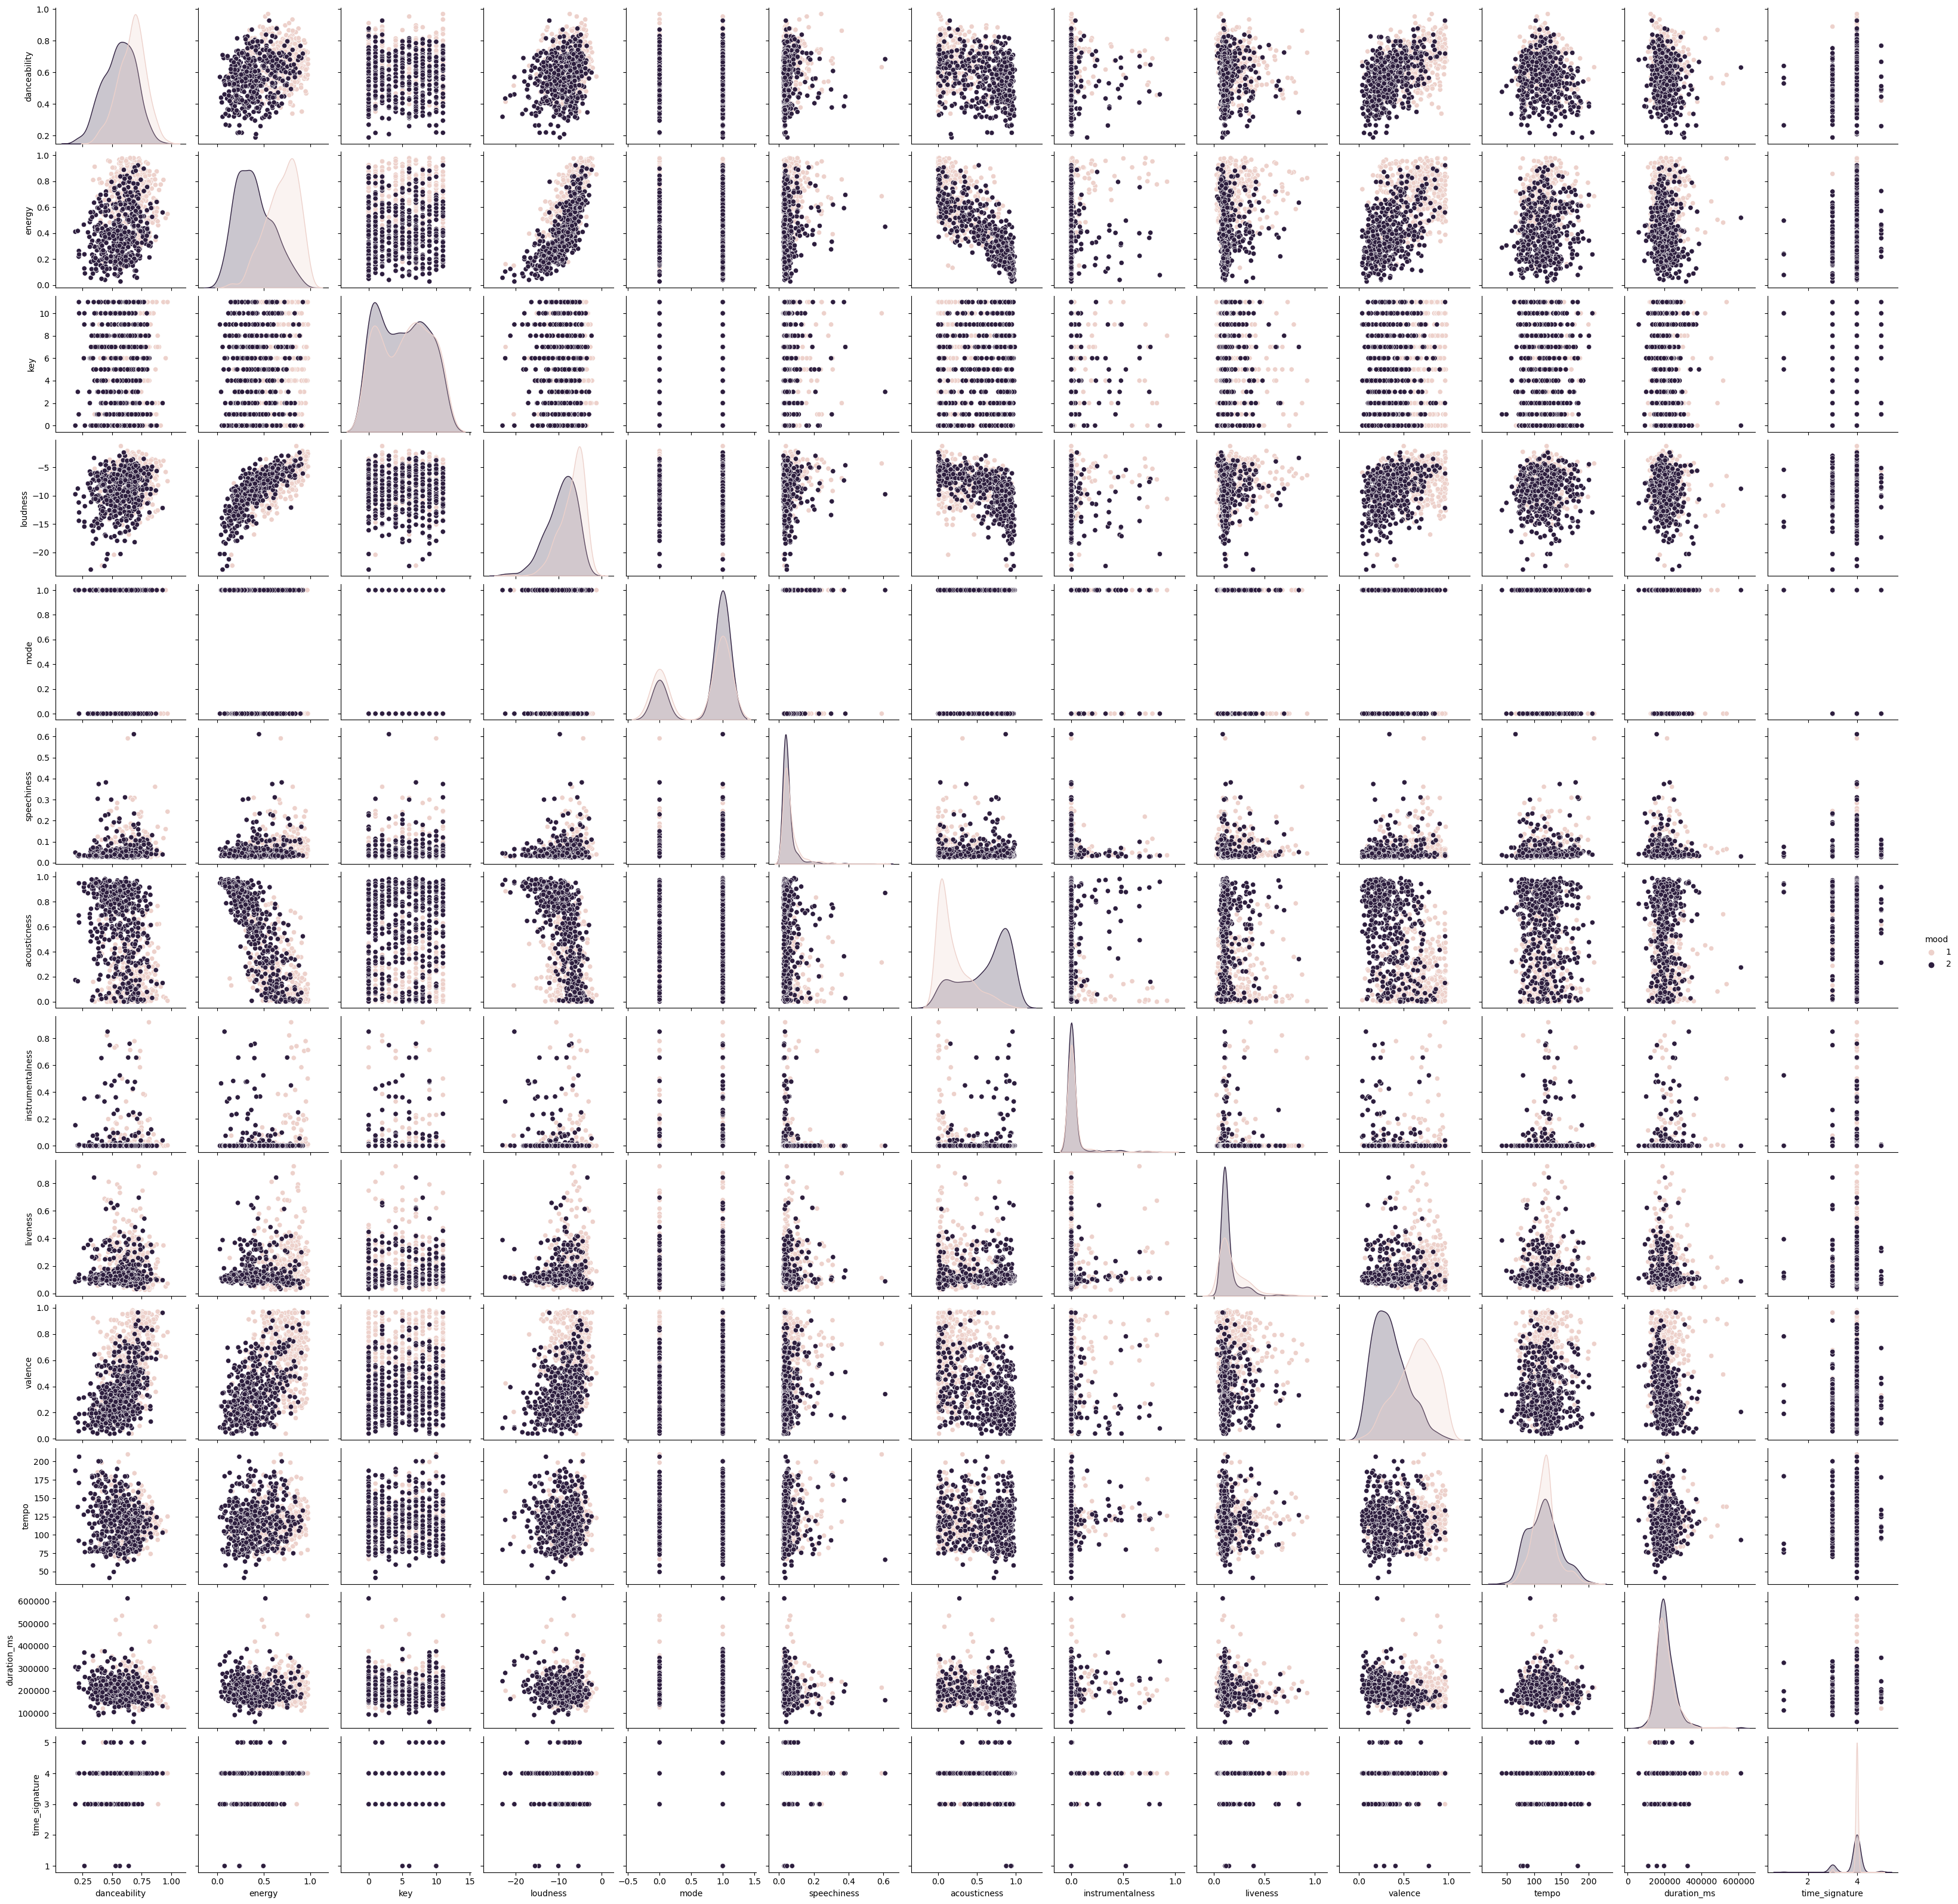

In [187]:
sns.pairplot(df,hue='mood')

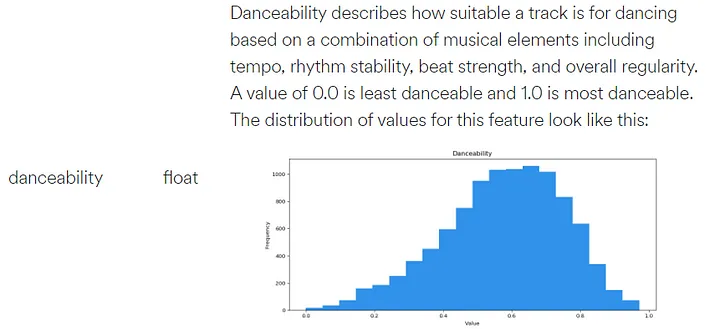

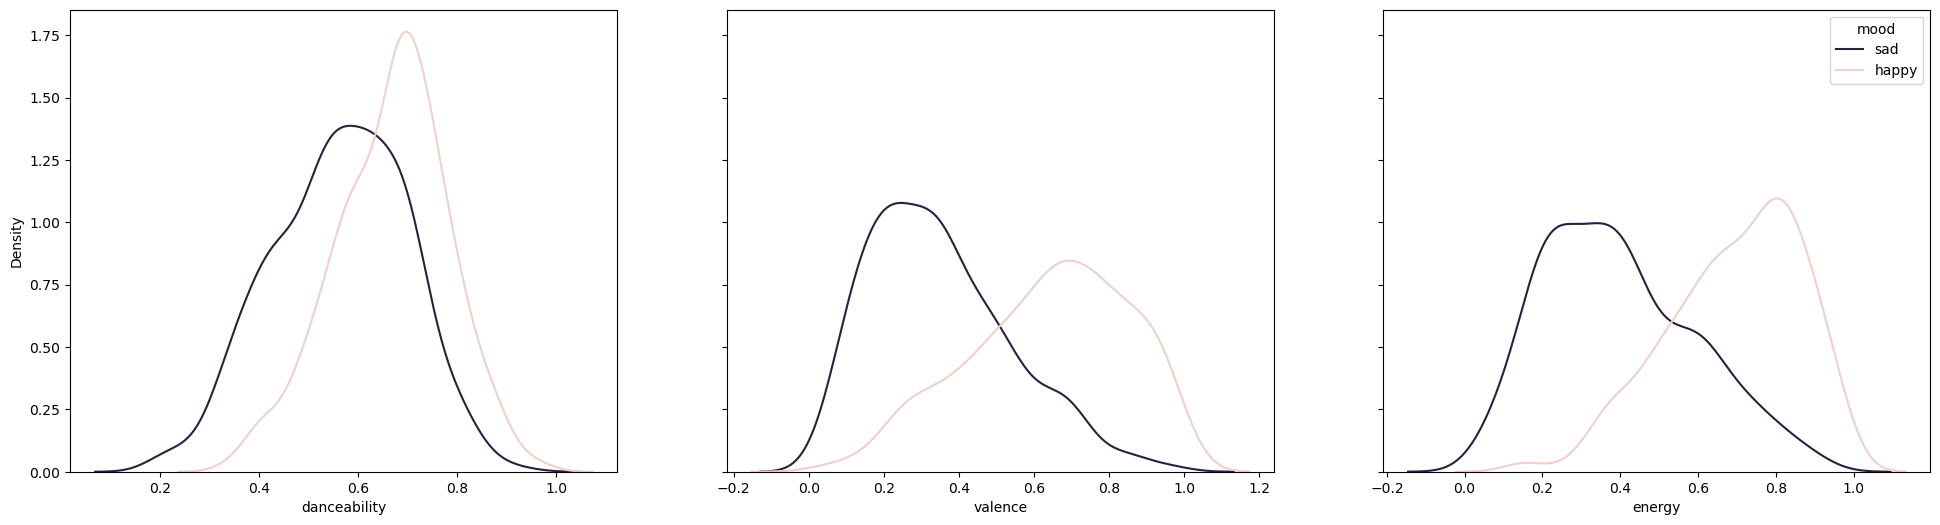

In [188]:
fig, axes = plt.subplots(1,3,figsize=(24,6),sharey=True)
sns.kdeplot(data=df,x='danceability',hue='mood',ax=axes[0])
sns.kdeplot(data=df,x='valence',hue='mood',ax=axes[1])
sns.kdeplot(data=df,x='energy',hue='mood',ax=axes[2])

for ax in axes:
    ax.legend([],[], frameon=False)
ax.legend(title='mood',labels=['sad','happy'])
plt.show()

# Test Train Split

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
df.drop(['artist','album','track_name','track_id'],axis=1,inplace=True)

In [191]:
X = df.drop(['mood'],axis=1)
y = df['mood']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Decision Tree Classification

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
dtree = DecisionTreeClassifier()

In [195]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [196]:
predictions = dtree.predict(X_test)

In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [198]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.76      0.77      0.76       118
           2       0.80      0.79      0.80       139

    accuracy                           0.78       257
   macro avg       0.78      0.78      0.78       257
weighted avg       0.78      0.78      0.78       257



In [199]:
print(confusion_matrix(y_test,predictions))

[[ 91  27]
 [ 29 110]]


## Tree Visualization

In [200]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[:-1])
features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

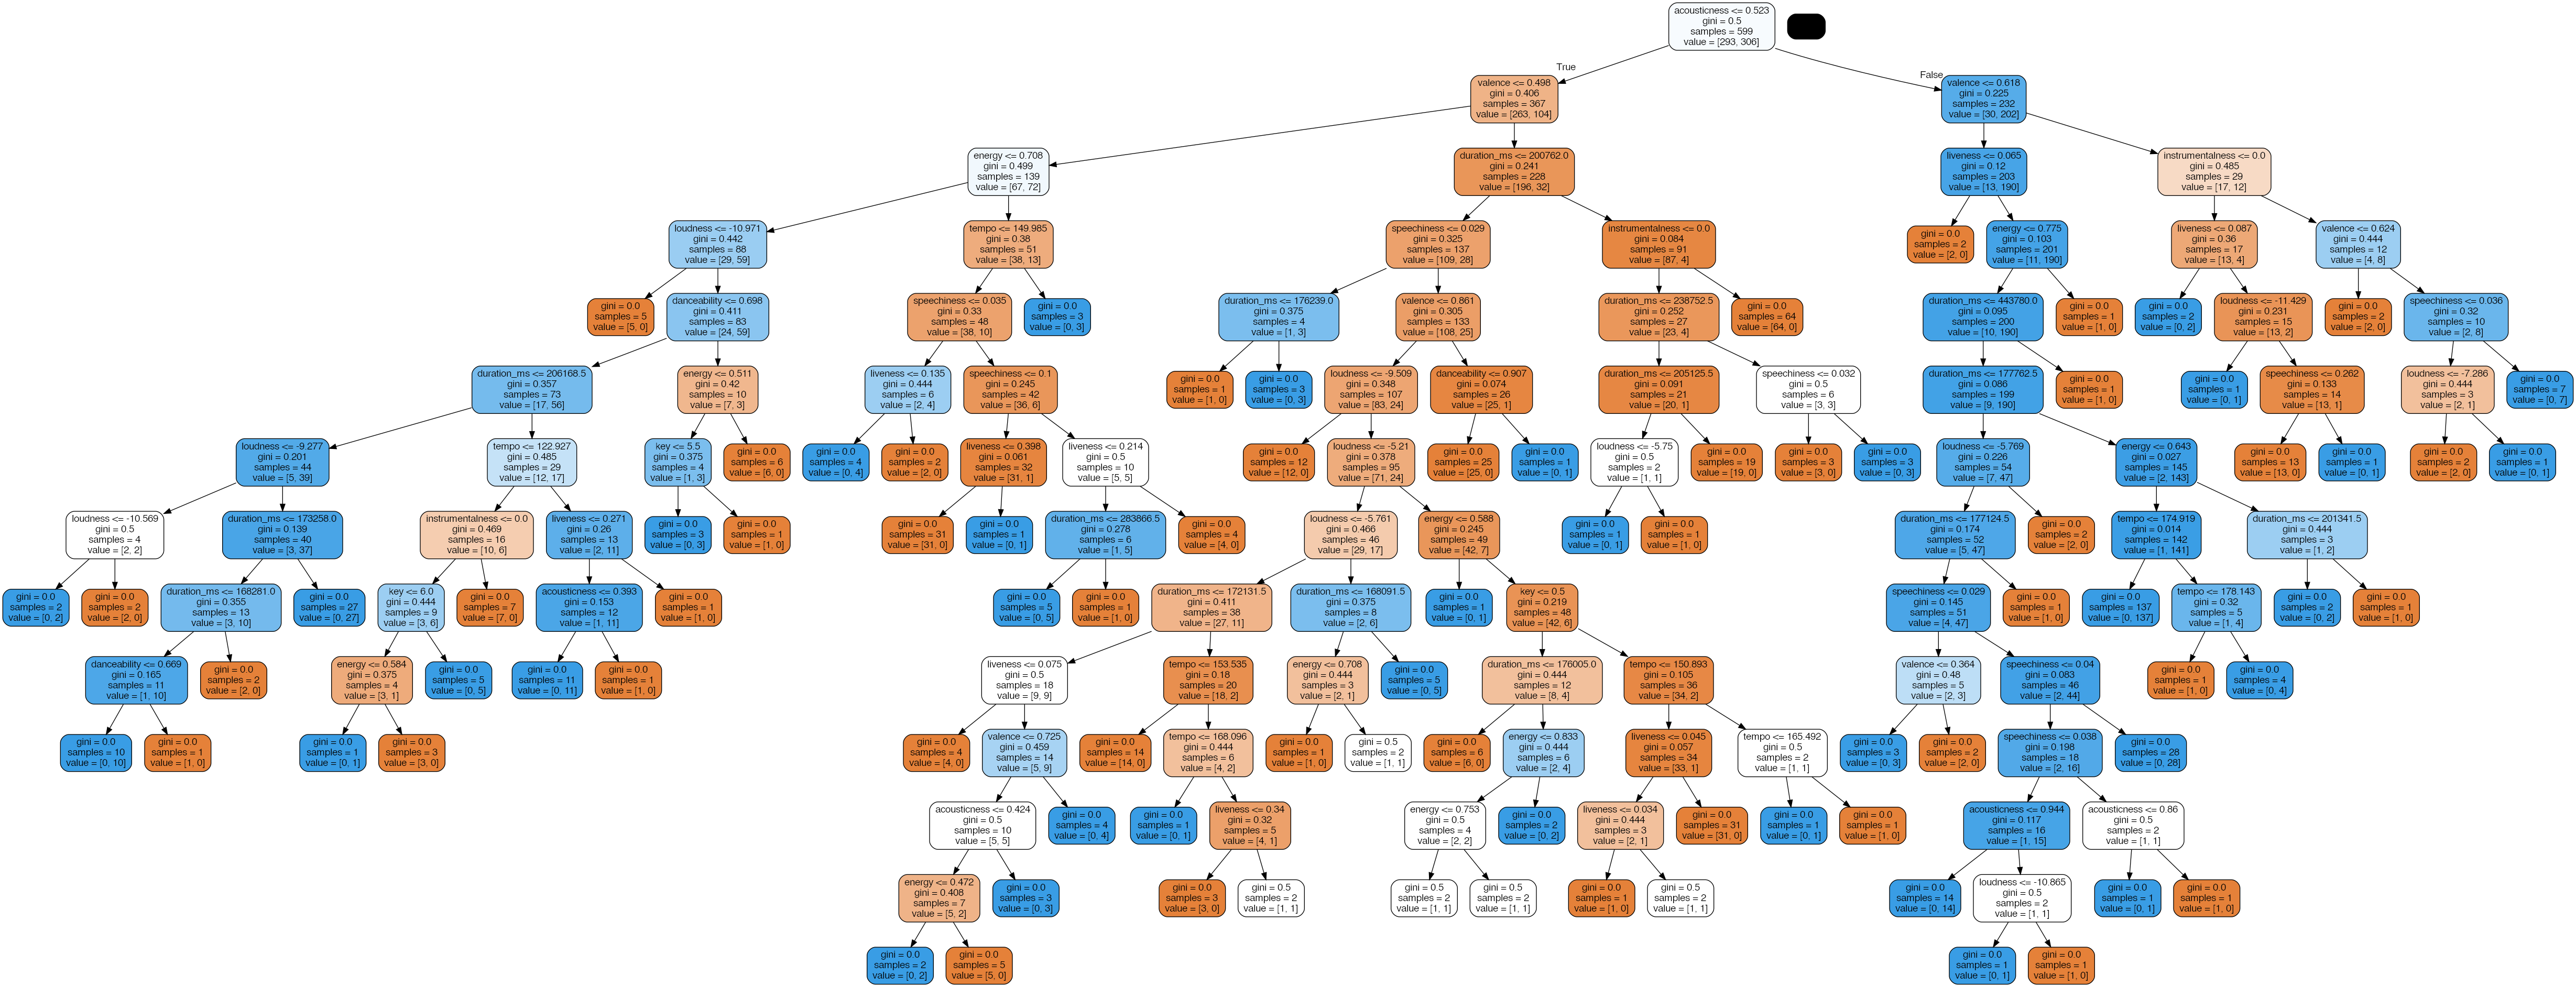

In [201]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest Classification

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfc = RandomForestClassifier(n_estimators=100)

In [204]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluations

In [205]:
rfc_pred = rfc.predict(X_test)

In [206]:
print(confusion_matrix(y_test,rfc_pred))

[[106  12]
 [ 20 119]]


In [207]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.84      0.90      0.87       118
           2       0.91      0.86      0.88       139

    accuracy                           0.88       257
   macro avg       0.87      0.88      0.88       257
weighted avg       0.88      0.88      0.88       257



# Model Evaluation / Tuning

## Feature Selection

In [208]:
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:1} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: acousticness Importance: 0.23
Variable: valence Importance: 0.19
Variable: energy Importance: 0.15
Variable: danceability Importance: 0.07
Variable: loudness Importance: 0.07
Variable: liveness Importance: 0.06
Variable: speechiness Importance: 0.05
Variable: tempo Importance: 0.05
Variable: duration_ms Importance: 0.05
Variable: key Importance: 0.03
Variable: instrumentalness Importance: 0.03
Variable: mode Importance: 0.01
Variable: time_signature Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Cumulative Importances')

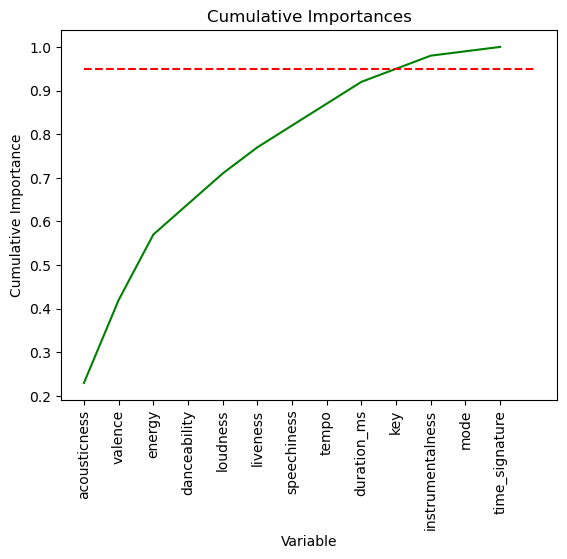

In [209]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

In [210]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 10


In [211]:
# df.drop(['key','mode','time_signature'],axis=1,inplace=True)

Since each metric has a relatively significant importance on the classification of the mood (as shown on the graph), I've decided to keep all features as dropping them lead to no significant improvement in performance.

## Hyperparameter Tuning Through K-Fold CV

In [212]:
from pprint import pprint
# RandomForestClassifier().get_params().keys()
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [213]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [214]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1518 degrees.
Accuracy = 90.47%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.1323 degrees.
Accuracy = 91.05%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.65%.


### Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt'],
    'min_samples_leaf': [0, 1, 2],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [600, 700, 800, 1500]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=0, min_samples_split=3, n_estimators=600;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=0, min_samples_split=3, n_estimators=600;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=0, min_samples_split=3, n_estimators=600;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=0, min_samples_split=3, n_estimators=600;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=0, min_samples_split=3, n_estimators=600;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=0, min_samples_split=3, n_estimators=700;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=Fa

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\ProgramData\Anaconda3\lib\site-packages

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [0, 1, 2],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [600, 700, 800, 1500]},
             verbose=3)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 700}

In [ ]:
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.1440 degrees.
Accuracy = 89.88%.
Model Performance
Average Error: 0.1401 degrees.
Accuracy = 90.66%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.87%.


In [ ]:
grid_predictions = best_grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[106  12]
 [ 24 115]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.82      0.90      0.85       118
           2       0.91      0.83      0.86       139

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



# Model Save

In [ ]:
import pickle
pickle.dump(best_grid,open('model.pkl','wb'))

# Sample Prediction

In [ ]:
def classify_playlist(creator, playlist_id):
    playlist = analyze_playlist(creator, playlist_id)
    playlist_predictions = best_grid.predict(playlist.drop(['artist','album','track_name','track_id'],axis=1))
    playlist['prediction'] = playlist_predictions
    playlist['prediction'] = playlist['prediction'].replace(1, 'Happy')
    playlist['prediction'] = playlist['prediction'].replace(2, 'Sad')
    return playlist

In [ ]:
def classify_rating(playlist):
    # values = playlist['prediction'].value_counts().keys().tolist()
    counts = playlist['prediction'].value_counts().tolist()
    happiness_rating = counts[1] / counts[0]
    return happiness_rating

In [ ]:
sample = classify_playlist('Matthew Lim', '30cdY3LXb1nZBdTY05wEXj') # vibes_to_reset playlist

In [ ]:
print('Happiness Rating:', "{0:.0%}".format(classify_rating(sample)))

Happiness Rating: 47%
